[*********************100%%**********************]  1 of 1 completed


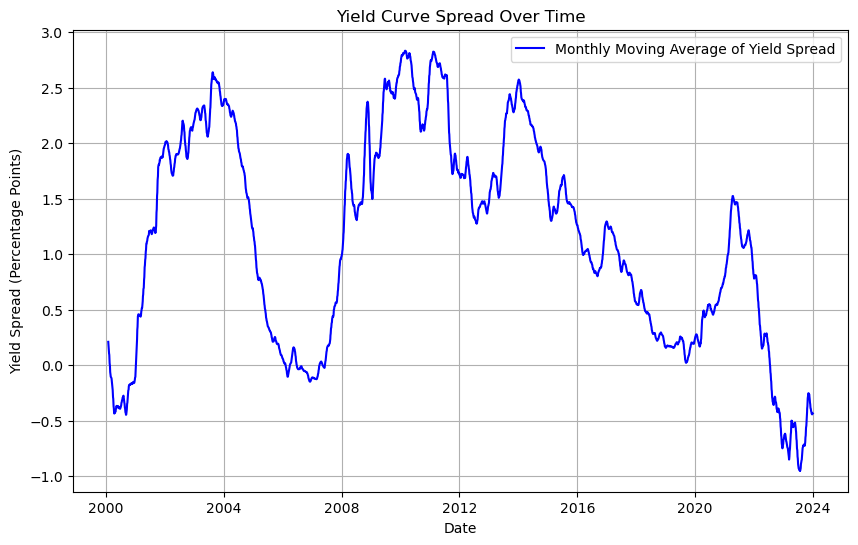

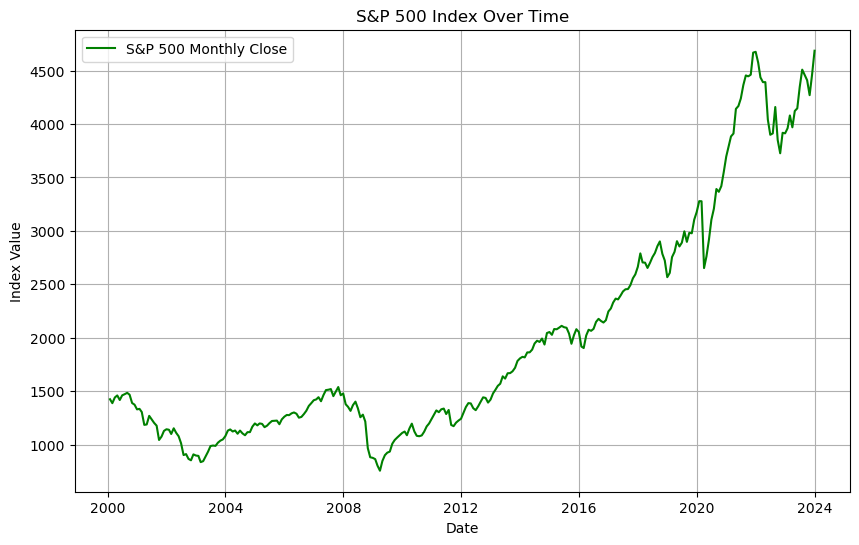

In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

# Define the tickers for 2-year and 10-year Treasury bond yields from FRED
ticker_2y = "DGS2"  # FRED code for 2-year Treasury bond yield
ticker_10y = "DGS10"  # FRED code for 10-year Treasury bond yield
sp500_ticker = "^GSPC"  # Ticker symbol for S&P 500 Index
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data from FRED
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Fetch S&P 500 data
sp500_data = yf.download(sp500_ticker, start=start, end=end)

# Aligning both datasets on the same dates
combined_data = pd.concat([data_2y, data_10y], axis=1)
combined_data.columns = ['2Y', '10Y']
combined_data.dropna(inplace=True)

# Calculate the yield spread (10-year yield minus 2-year yield)
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Calculate the monthly moving average of the yield spread
combined_data['Monthly_MA'] = combined_data['Spread'].rolling(window=21).mean()

# Plotting the monthly moving average of the yield spread
plt.figure(figsize=(10, 6))
plt.plot(combined_data['Monthly_MA'], label='Monthly Moving Average of Yield Spread', color='blue')
plt.title('Yield Curve Spread Over Time')
plt.ylabel('Yield Spread (Percentage Points)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Resample S&P 500 data to get monthly values
sp500_monthly = sp500_data['Adj Close'].resample('M').mean()

# Plotting the S&P 500 monthly data
plt.figure(figsize=(10, 6))
plt.plot(sp500_monthly, label='S&P 500 Monthly Close', color='green')
plt.title('S&P 500 Index Over Time')
plt.ylabel('Index Value')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()
